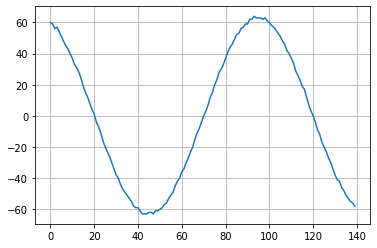

In [1]:
import socket
import time
import numpy as np
import matplotlib.pyplot as plt

# Create an TCP socket
def SocketConnect(ip,port):
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.connect((ip,port))
    s.setblocking(False)
    return s

# Send message to the scope
def SocketQuery(sock, cmd, size=8000):
    sock.sendall(cmd + b'\n')
    data = None    
    while True:
        try:
            time.sleep(0.01)
            if data == None:
                data = sock.recv(size)
            else:
                data += sock.recv(size)
        except BlockingIOError:
            if data == None:
                pass
            else:
                return data

# Close the socket
def SocketClose(Sock):
    Sock.close()
    time.sleep(5)

ip = "169.254.1.177"
port = 5025
try:
    s = SocketConnect(ip,port)
    response = SocketQuery(s, b'C1:WF? DAT2', size=10000_000)
except Exception as e:
    print(repr(e))
finally:
    SocketClose(s)

_nine = response.index(b'#9')
wave = response[_nine+11:-2]
w = np.frombuffer(wave,dtype=np.int8)

plt.plot(w)
plt.grid()